### Convolutional Neural Network (CNN)
- This part introduces convolutional neural networks (CNN) , also known as convnets. 
- Convnet is used in computer vision applications.
- It is best used for 2-D image data.
- In convnet, we use a stack of Conv2D and MaxPooling 2D layers.

In [26]:
# Let's train a convnet on fasion MNIST.
# our task is to recognize accesories and clothing images of the dataset.
# we first prepare the data.

import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist

In [27]:
# from tf.keras.datasets import fashion mnist


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images=train_images.reshape(60000, 28, 28, 1)

# the shape of train_images is (60000,28,28), 
# it is importatnt to reshape it to (60000,28,28, 1)
# If you don't do this, 
# you'll get an error when training as the Convolutions do not recognize the shape.

train_images = train_images.astype('float32') / 255

test_images=test_images.reshape(10000, 28, 28, 1)
test_images = test_images.astype('float32') / 255



In [28]:
train_images.shape

(60000, 28, 28, 1)

In [29]:
# now we build a convnet
# it consists of layers of Conv2D and MaxPoolin2D

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# dense (fully-connected layers)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


### Explanation of convnet
- the model is sequential.
- instead of dense layers, we add Conv2D layers and MaxPooling2D layers.
- We examine the first layer:
- Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1))
    1. it is Conv2D layer, not a dense layer.
    2. the shape of each image is 3-D tensor (28,28,1), we don't need to flatten it. Each image has 28*28 pixesl, since it is black and white, only 1 color channel.
    3. the activiation function is relu.
    4. The first layers has 64 filters, it will produce 64 output maps. It is quite arbitrary, usually 32 or 64.
- MaxPooling2D
    1. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. 
    2. the idea is that it creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1. 
    3. It halves the number of vertical pixels, effectively reducing the image by 25%.

In [30]:
# we can look at the architecture of the convnet
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

- You can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). 
- The width and height dimensions tend to shrink as you go deeper in the network. 
- The number of filters is controlled by the first argument passed to the Conv2D layers (64 for the first convnet layer).

- next, we feed the output tensor of convnet into a stack of dense layers.
- the shape of output tensor of convnet is (5,5,64)
- we need to flatten it before feeding it into a stack of dense layers. tf.keras.layers.Flatten()



In [31]:
# we can then compile and fit the model.

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

# Using a CPU to run the model can take long time.

Epoch 1/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.6178 - accuracy: 0.7770
Epoch 2/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.3042 - accuracy: 0.8881
Epoch 3/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2518 - accuracy: 0.9062
Epoch 4/5
1875/1875 [==============================] - 80s 42ms/step - loss: 0.2136 - accuracy: 0.9209
Epoch 5/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.1926 - accuracy: 0.9294


In [32]:
# finally, we can evaluate the model on test data.
model.evaluate(test_images, test_labels)
# the accuracy of the model has improved to over 90%

313/313 [==============================] - 4s 11ms/step - loss: 0.2525 - accuracy: 0.9087


[0.2524745464324951, 0.9086999893188477]

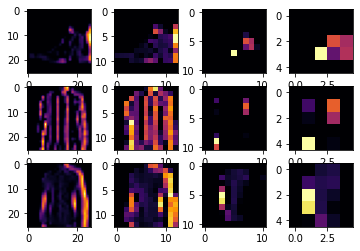

In [65]:
## visualizing the Convolutions and Pooling
# we want to visualize the output of different layers.

import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26

# we look at 0th, 7th and 26th images.

CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]

# model.layers:  there are 7 layers in the model.

# activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))
# the output of each layer.

# axarr[0,x].imshow(f1[0 , : , :, CONVOLUTION_NUMBER], cmap='inferno')
# if CONVOLUTION_NUMBER = 1, and x = 0
# it will show the image of 0th layer from the 1st convolution.


# axarr[0,x].imshow(f1[0 , : , :, CONVOLUTION_NUMBER], cmap='inferno')
# if CONVOLUTION_NUMBER = 1, and x = 1
# it will show the image of 1st layer from the 1st convolution.


activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0 , : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [86]:
# We will look at another example of convnet.
# first, let's import some modules.

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
# from keras.utils import to_categorical

In [87]:
# we will then download CIFAR10 dataset, it contains 60000 color images in 10 classes.

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = train_images / 255.0, test_images / 255.0

y_train = train_labels
y_test = test_labels


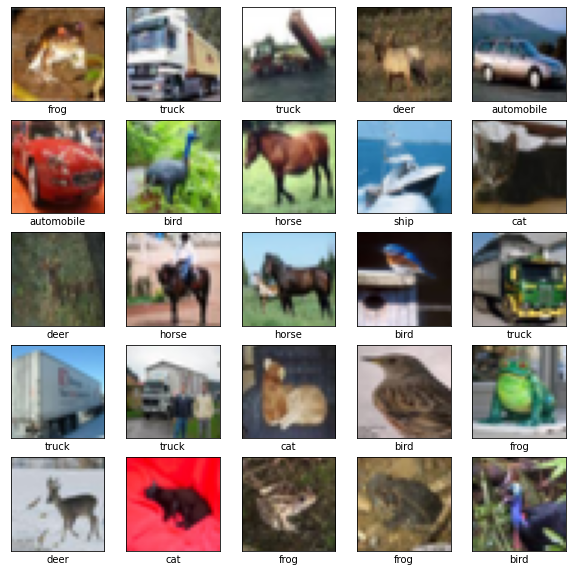

In [88]:
# let's display some images.

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [89]:
# now we can create a convnet.
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# add dense layers.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation ='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [90]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

In [91]:
x_partial_train = x_train[:40000]
y_partial_train = y_train[:40000]
x_val = x_train[40000:]
y_val = y_train[40000:]

# split the training data into training set and validation set.


history = model.fit(x_partial_train, y_partial_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
313/313 [==============================] - 53s 166ms/step - loss: 1.9802 - accuracy: 0.2746 - val_loss: 1.6966 - val_accuracy: 0.3813
Epoch 2/10
313/313 [==============================] - 47s 150ms/step - loss: 1.4908 - accuracy: 0.4624 - val_loss: 1.3588 - val_accuracy: 0.5284
Epoch 3/10
313/313 [==============================] - 44s 142ms/step - loss: 1.2970 - accuracy: 0.5407 - val_loss: 1.3683 - val_accuracy: 0.5174
Epoch 4/10
313/313 [==============================] - 45s 144ms/step - loss: 1.1778 - accuracy: 0.5787 - val_loss: 1.1573 - val_accuracy: 0.5934
Epoch 5/10
313/313 [==============================] - 45s 143ms/step - loss: 1.0568 - accuracy: 0.6285 - val_loss: 1.0900 - val_accuracy: 0.6146
Epoch 6/10
313/313 [==============================] - 47s 150ms/step - loss: 0.9917 - accuracy: 0.6556 - val_loss: 1.0498 - val_accuracy: 0.6260
Epoch 7/10
313/313 [==============================] - 48s 152ms/step - loss: 0.9050 - accuracy: 0.6827 - val_loss: 0.9145 - val_ac

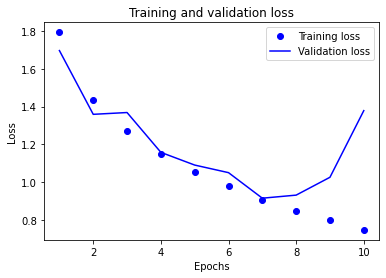

In [92]:
# we can plot the changes of training loss and validation loss over epochs.

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

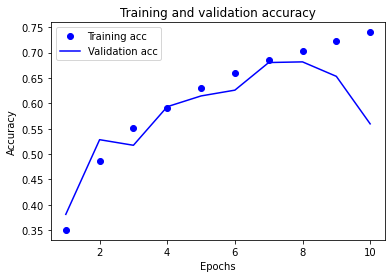

In [93]:
# we can plot the changes of training accuracy and validation accuracy over epochs.

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [95]:
# based on the above plots, we should run 7  epochs
# we will start from scartch and train on the entire training set.


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# add dense layers.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation ='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=7, batch_size=128)

Epoch 1/7
391/391 [==============================] - 58s 147ms/step - loss: 1.9442 - accuracy: 0.2793s - loss: 1.9453 - accuracy: 0.
Epoch 2/7
391/391 [==============================] - 58s 148ms/step - loss: 1.4128 - accuracy: 0.4965
Epoch 3/7
391/391 [==============================] - 59s 150ms/step - loss: 1.2094 - accuracy: 0.5730
Epoch 4/7
391/391 [==============================] - 58s 149ms/step - loss: 1.0818 - accuracy: 0.6221
Epoch 5/7
391/391 [==============================] - 59s 151ms/step - loss: 0.9809 - accuracy: 0.6567
Epoch 6/7
391/391 [==============================] - 54s 139ms/step - loss: 0.9024 - accuracy: 0.6855
Epoch 7/7
391/391 [==============================] - 57s 146ms/step - loss: 0.8364 - accuracy: 0.7082


In [96]:
# now we can evaluate it on test data
results = model.evaluate(x_test,  y_test, batch_size=128, verbose=0)
results

[0.8931782245635986, 0.6877999901771545]

In [97]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)               

### Using ImageDataGenerator()
- For the following example:
- instead of loading all the images, we will load a batch of images and train the model on the fly.

In [125]:
# first you can install wget to download some web files.
!pip install wget
import wget
import os

In [126]:
url1 = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip'
url2 = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip' 

In [127]:
destination = os.getcwd()

In [128]:
wget.download(url1, out = destination)
wget.download(url2, out = destination)
# use wget to download the zip file and put it in work directory

  0% [                                                                      ]    663552 / 149574867

  1% [                                                                      ]   1523712 / 149574867

  1% [.                                                                     ]   2326528 / 149574867

  2% [.                                                                     ]   3178496 / 149574867

  2% [..                                                                    ]   4292608 / 149574867

  3% [..                                                                    ]   5300224 / 149574867

  4% [...                                                                   ]   6578176 / 149574867

  5% [...                                                                   ]   7692288 / 149574867

  5% [....                                                                  ]   8667136 / 149574867

  6% [....                                                                  ]   9535488 / 149574867

100% [........................................................................] 11480187 / 11480187

'E:\\DataScience\\Python/validation-horse-or-human (1).zip'

In [129]:
# now we will unzip files and put the images in different folders
import zipfile

local_zip = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('horse-or-human')

# the above steps extract the zip file "horse-or-human.zip"
# and put them in the folders "horse-or-human"



In [130]:
## we can do the same for the validation set
import zipfile

local_zip = 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('validation-horse-or-human')

- The folder "horse-or-human" has two subfolders, "horses" and "humans"
- the subfolder "horses" contains a lot of horse images
- the subfolder "humans" contains a lot of images of humans.
- That is also the case for the folder "validation-horse-or-human'

In [131]:
# let's read the file names of some images
train_horse_dir = os.path.join('horse-or-human/horses')

train_human_dir = os.path.join('horse-or-human/humans')

# this will list the filenames of the files in a given directory
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

# the files are in the format of png.

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


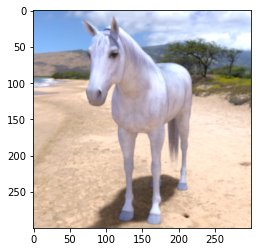

In [132]:
# let's show an image,
# we need matplotlib.pyplot and matplotlib.image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img_path = os.path.join(train_horse_dir, train_horse_names[0])
# the path of the first image
img = mpimg.imread(img_path)
plt.imshow(img)

In [135]:
## now we can build a model
import tensorflow as tf

In [136]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [137]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 33, 33, 64)      

In [138]:
# We will train our model with the binary_crossentropy loss, 
# it's a binary classification problem and our final activation is a sigmoid. 
# We will use the rmsprop optimizer with a learning rate of 0.001. 
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

### Data Preprocessing
- We set up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. 
- We'll have one generator for the training images and one for the validation images. 
- Our generators will yield batches of images of size 300x300 and their labels (binary).
- we use keras.preprocessing.image.ImageDataGenerator to do that

In [141]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


- The datagenerator will automatically label the image with the name of the folder, which contains that image.

In [142]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

# we need to specify the steps_per_epoch, 
# it is based on the number of images, and the batch size

Epoch 1/15
8/8 [==============================] - 81s 10s/step - loss: 1.0960 - accuracy: 0.5280 - val_loss: 0.6750 - val_accuracy: 0.6016
Epoch 2/15
8/8 [==============================] - 80s 10s/step - loss: 0.6634 - accuracy: 0.6331 - val_loss: 0.5917 - val_accuracy: 0.5664
Epoch 3/15
8/8 [==============================] - 94s 13s/step - loss: 0.6740 - accuracy: 0.6737 - val_loss: 0.5918 - val_accuracy: 0.5977
Epoch 4/15
8/8 [==============================] - 84s 10s/step - loss: 0.5426 - accuracy: 0.8125 - val_loss: 0.8148 - val_accuracy: 0.7969
Epoch 5/15
8/8 [==============================] - 84s 10s/step - loss: 0.4682 - accuracy: 0.8308 - val_loss: 0.3121 - val_accuracy: 0.8945
Epoch 6/15
8/8 [==============================] - 80s 10s/step - loss: 0.4708 - accuracy: 0.8047 - val_loss: 0.6422 - val_accuracy: 0.8633
Epoch 7/15
8/8 [==============================] - 87s 11s/step - loss: 0.1284 - accuracy: 0.9580 - val_loss: 0.8231 - val_accuracy: 0.8750
Epoch 8/15
8/8 [===========

In [146]:
import numpy as np
from keras.preprocessing import image

# use the following lines to upload an image if you are using google colab

# from google.colab import files
# uploaded = files.upload()
# path = list(uploaded.keys())[0]


img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print("it is a human")
else:
    print("it is a horse")

[0.]
it is a horse
